In [1]:
#ライブラリとデータを準備する
from os import name
import numpy as np
import pandas as pd

%precision 3
pd.set_option('precision', 3)

#データの読み込み
df = pd.read_csv('./data/ch2_scores_em.csv', index_col='生徒番号')

#最初の10人分のデータを用意する
en_scores = np.array(df['英語'])[:10]
ma_scores = np.array(df['数学'])[:10]
scores_df = pd.DataFrame({'英語':en_scores, '数学':ma_scores}, index=pd.Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], name='生徒'))
scores_df
 




,英語,数学
生徒,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [2]:
#共分散：(p45)点数の散布と符号付け面積の図において、共分散は正であれば正の面積となるデータが多いということで正の相関を、
#負であれば負の面積になるデータが多いということで負の相関があるといえる。
#正と負どちらでもなく、共分散が0に近ければ無相関を表す。
#DataFreameでまとめつつ、共分散を計算する。
summary_df = scores_df.copy()
summary_df['英語の偏差'] = summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] = summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] = summary_df['英語の偏差'] - summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,-6.6
B,69,80,14.0,8.6,5.4
C,56,63,1.0,-8.4,9.4
D,41,63,-14.0,-8.4,-5.6
E,57,76,2.0,4.6,-2.6
F,48,60,-7.0,-11.4,4.4
G,65,81,10.0,9.6,0.4
H,49,66,-6.0,-5.4,-0.6
I,65,78,10.0,6.6,3.4


In [3]:
#偏差同士の積の平均値を求める
summary_df['偏差同士の積'].mean()

0.000

In [4]:
#共分散：(p45)点数の散布と符号付け面積の図において、共分散は正であれば正の面積となるデータが多いということで正の相関を、
#負であれば負の面積になるデータが多いということで負の相関があるといえる。
#正と負どちらでもなく、共分散が0に近ければ無相関を表す。
#DataFreameでまとめつつ、共分散を計算する。
summary_df = scores_df.copy()
summary_df['英語の偏差'] = summary_df['英語'] - summary_df['英語'].mean()
summary_df['数学の偏差'] = summary_df['数学'] - summary_df['数学'].mean()
summary_df['偏差同士の積'] = summary_df['英語の偏差'] * summary_df['数学の偏差']
summary_df

,英語,数学,英語の偏差,数学の偏差,偏差同士の積
生徒,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [5]:
#偏差同士の積の平均値を求める
summary_df['偏差同士の積'].mean()

62.800

In [6]:
#NumPyの場合、共分散はcov関数で求めることができる。但し返り値は共分散という値ではなく、共分散行列または、分散共分散行列と呼ばれる行列である。
cov_mat = np.cov(en_scores, ma_scores, ddof=0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [7]:
#cov関数で求めた共分散の行列において、1行1列目が第1引数の英語、2行2列目が第2引数の数学にそれぞれ対応しており、それらが交わる1行2列目と2行1列目の成分が英語と数学の共分散(偏差同士の積の平均値)に該当する。
#Pythonのインデックスは0始まりなので、結局cov_matの[0,1]成分と[1,0]成分が共分散である。
cov_mat[0,1], cov_mat[1,0]

(62.800000000000004, 62.800000000000004)

In [8]:
#同じ変数同士の共分散はその変数の分散と等しくなっている。[0,0]成分は英語の分散、[1,1]成分は数学の分散になる。
cov_mat[0,0], cov_mat[1,1]

(86.0, 68.44000000000001)

In [9]:
#英語と数学の分散値は分散と一致
np.var(en_scores, ddof=0), np.var(ma_scores, ddof=0)

(86.0, 68.44000000000001)

In [10]:
#相関係数
#英語と数学の相関係数を求めてみる
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [11]:
#相関係数をcorrcoef関数で計算すると、返り値は共分散の時と同じ相関行列(correlation matrix)
np.corrcoef(en_scores, ma_scores)

array([[1.   , 0.819],
       [0.819, 1.   ]])

In [12]:
#同様の結果を,DataFrameのcorrメソッドを使って得る
scores_df.corr()

,英語,数学
英語,1.000,0.819
数学,0.819,1.000


In [13]:
#2次元データの視覚化
#matplotlibの準備
import matplotlib.pyplot as plt

%matplotlib inline

/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 33521 missing from current fon

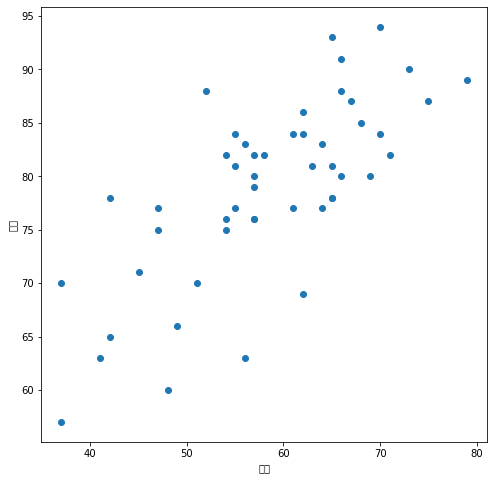

In [15]:
#散布図
#scatterメソッドで散布図を描画できる。
#scatterの第1引数がx軸、第2引数がy軸のデータである。
english_scores = np.array(df['英語'])
math_scores = np.array(df['数学'])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

#散布図
ax.scatter(english_scores, math_scores)
ax.set_xlabel('英語')
ax.set_ylabel('数学')

plt.show()

/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 33521 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 35486 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 28857 missing from current fon

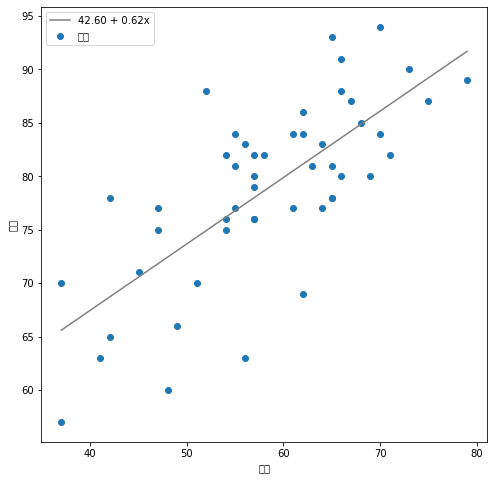

In [18]:
#回帰直線
#NumPyを使って回帰直線を求める
#np.polyfit関数とnp.poly1d関数を使う。
#英語の点数をx、数学の点数をyとしたときの回帰直線はy=β0+β1xで表される

#回帰直線を散布図と一緒に描画する
#係数β0とβ1を求める
poly_fit = np.polyfit(english_scores, math_scores, 1)
#β0+β1xを返す関数を作る
poly_1d = np.poly1d(poly_fit)
#直線を描画するためのx座標を作る
xs = np.linspace(english_scores.min(), english_scores.max())
#xsに対応するy座標を求める
ys = poly_1d(xs)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('英語')
ax.set_ylabel('数学')
ax.scatter(english_scores, math_scores, label='点数')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x')
#凡例の表示
ax.legend(loc='upper left')

plt.show()

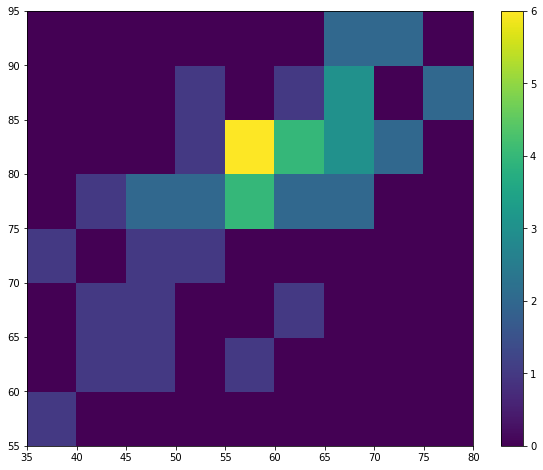

In [19]:
#ヒートマップ
#ヒートマップはヒストグラムの2次元版を色によって表すことができるグラフ
#hist2dメソッドで作成することができる
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.hist2d(english_scores, math_scores, bins=[9, 8], range=[(35, 80), (55, 95)])
ax.set_xticks(c[1])
ax.set_yticks(c[2])
#カラーバーの表示
fig.colorbar(c[3], ax=ax)
plt.show()

In [20]:
#アンスコムの例
#データの中で同じ指標を持っているが全く異なるデータという例を、アンスコムの例という。
anscombe_data = np.load('./data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [21]:
#各データの平均・分散・相関係数・回帰直線を計算してDataFrameにまとめる。
stats_df = pd.DataFrame(index=['Xの平均', 'Xの分散', 'Yの平均', 'Yの分散', 'XとYの相関係数', 'XとYの回帰直線'])

for i, data in enumerate(anscombe_data):
    dataX = data[:, 0]
    dataY = data[:, 1]
    poly_fit = np.polyfit(dataX, dataY, 1)
    stats_df[f'data{i+1}'] =\
        [f'{np.mean(dataX):.2f}',
         f'{np.var(dataX):.2f}',
         f'{np.mean(dataY):.2f}',
         f'{np.var(dataY):.2f}',
         f'{np.corrcoef(dataX, dataY)[0, 1]:.2f}',
         f'{poly_fit[1]:.2f} + {poly_fit[0]:.2f}x']

stats_df

,data1,data2,data3,data4
Xの平均,9.00,9.00,9.00,9.00
Xの分散,10.00,10.00,10.00,10.00
Yの平均,7.50,7.50,7.50,7.50
Yの分散,3.75,3.75,3.75,3.75
XとYの相関係数,0.82,0.82,0.82,0.82
XとYの回帰直線,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x,3.00 + 0.50x


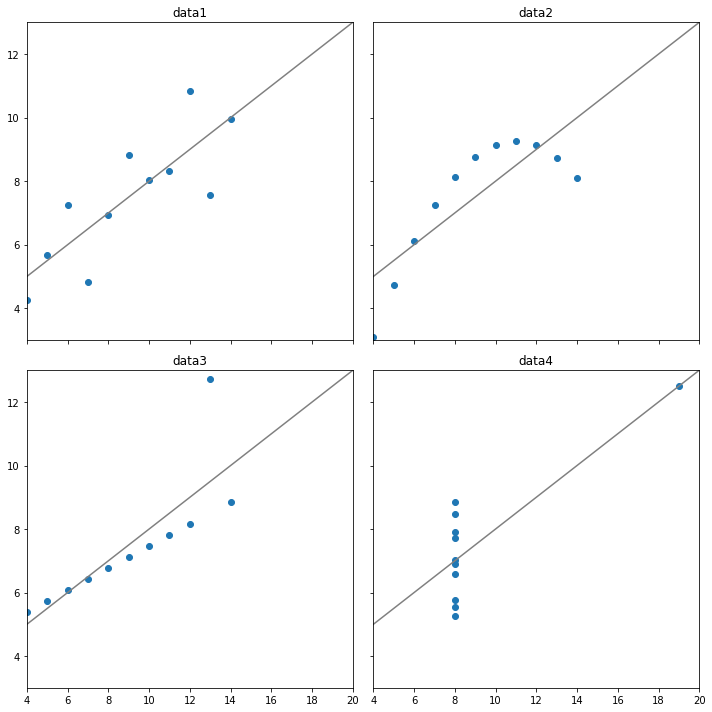

In [25]:
#data1~data4までどのデータも回帰直線の式まですべてが一致している。
#指標上はこの4つのデータはすべて同じである。
#これら4つのデータが全く同じであるかを確認するために散布図を描画してみる。

#グラフを描画する領域を2×2個作る
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True, sharey=True)

xs = np.linspace(0, 30, 100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0], data[:,1], 1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    #描画する領域の選択
    ax = axes[i//2, i%2]
    ax.set_xlim([4, 20])
    ax.set_ylim([3, 13])
    #タイトルを付ける
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0], data[:,1])
    ax.plot(xs, ys, color='gray')

#グラフ同士の間隔を狭くする
plt.tight_layout()
plt.show()